In [1]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller,acf
from statsmodels.tsa.arima.model import ARIMA
from  pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from  pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')
import seaborn as sms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
missing_values=["na","-"]
bokhol=pd.read_excel('basedonnees.xlsx',na_values=missing_values,index_col=[0],parse_dates=True)

In [3]:
bokhol.describe(include="all")

,W2- Irradiance (W/m²),W3 - Irradiance (W/m²),W4 - Irradiance (W/m²),Temperature ambiante (°C),Vitesse du vent (m/s),Température module (°C),Production Centrale Meter 1 - (W)
count,105069.000000,105061.0,105062.000000,105074.000000,105077.000000,104872.000000,1.045020e+05
unique,NaN,41892.0,NaN,NaN,NaN,NaN,NaN
top,NaN,0.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,51572.0,NaN,NaN,NaN,NaN,NaN
mean,260.276651,NaN,259.809913,29.451952,2.900866,33.731880,4.486998e+06
std,347.886417,NaN,347.724505,5.162296,1.470228,6.458327,6.034425e+06
min,0.000000,NaN,0.000000,13.735000,0.000000,0.000000,0.000000e+00
25%,0.000000,NaN,0.000000,26.181775,1.700000,29.100000,0.000000e+00
50%,3.850000,NaN,3.525000,29.260000,2.835400,31.600000,1.356000e+05
75%,535.130000,NaN,532.142500,33.001700,3.883300,38.700000,9.030000e+06


In [4]:
bokhol.isnull().sum()

W2- Irradiance (W/m²)                 50
W3 - Irradiance (W/m²)                58
W4 - Irradiance (W/m²)                57
 Temperature ambiante (°C)            45
 Vitesse du vent (m/s)                42
Température module (°C)              247
Production Centrale Meter 1 - (W)    617
dtype: int64

In [5]:
bokhol=bokhol.dropna(axis=0)

In [8]:
bokhol.isnull().sum()

W2- Irradiance (W/m²)                0
W3 - Irradiance (W/m²)               0
W4 - Irradiance (W/m²)               0
 Temperature ambiante (°C)           0
 Vitesse du vent (m/s)               0
Température module (°C)              0
Production Centrale Meter 1 - (W)    0
dtype: int64

In [10]:
liste=list(bokhol.columns)
liste=liste[0:6]

production=bokhol.drop(liste,axis=1)
production

,Production Centrale Meter 1 - (W)
Date (+00:00),
2021-01-01 00:05:00,0.0
2021-01-01 00:10:00,0.0
2021-01-01 00:15:00,0.0
2021-01-01 00:20:00,0.0
2021-01-01 00:25:00,0.0
...,...
2021-12-31 20:40:00,0.0
2021-12-31 20:45:00,0.0
2021-12-31 20:50:00,0.0


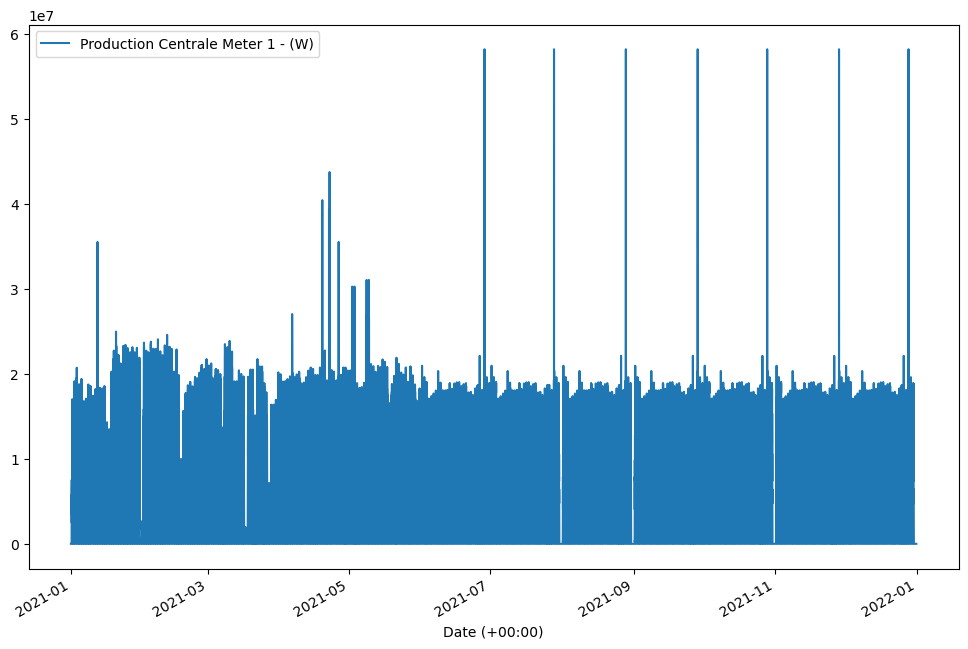

In [11]:
production.plot(figsize=(12,8))
plt.savefig('puissance.png')

In [12]:
production.max()

Production Centrale Meter 1 - (W)    58177200.0
dtype: float64

PREDICTION PAR LISSAGE EXPOTENTIELLE

In [ ]:
"""from statsmodels.tsa.api import ExponentialSmoothing

let=ExponentialSmoothing(production.values,seasonal_periods=12,seasonal='add').fit()
y_pred = let.forecast(365)
y_index=pd.date_range(production.index[len(production)-1], periods=365, freq='00h05t')

plt.figure(figsize=(15,8))
plt.plot(production, label='production')
plt.plot(pd.date_range(production.index[len(production)-1], periods=365, freq='00h05t'), abs(y_pred), label='production Predite')
plt.title('evolution de la production PV lissage expotentiel')
plt.legend()
plt.show()"""                             

"from statsmodels.tsa.api import ExponentialSmoothing\n\nlet=ExponentialSmoothing(production.values,seasonal_periods=12,seasonal='add').fit()\ny_pred = let.forecast(365)\ny_index=pd.date_range(production.index[len(production)-1], periods=365, freq='00h05t')\n\nplt.figure(figsize=(15,8))\nplt.plot(production, label='production')\nplt.plot(pd.date_range(production.index[len(production)-1], periods=365, freq='00h05t'), abs(y_pred), label='production Predite')\nplt.title('evolution de la production PV lissage expotentiel')\nplt.legend()\nplt.show()"

PREDICTION PAR LISSAGE EXPOTENTIELLE

In [ ]:
"""plt.figure(figsize=(15,8))
plt.plot(pd.date_range(production.index[len(production)-1], periods=365, freq='00h05t'),
         abs(y_pred), label='production Predite')
plt.title('evolution de la production PV lissage expotentiel')
plt.savefig('prediction_lissage_expotentiel.png')"""

"plt.figure(figsize=(15,8))\nplt.plot(pd.date_range(production.index[len(production)-1], periods=365, freq='00h05t'),\n         abs(y_pred), label='production Predite')\nplt.title('evolution de la production PV lissage expotentiel')\nplt.savefig('prediction_lissage_expotentiel.png')"

In [13]:
from pmdarima import auto_arima
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#orderModel1=auto_arima(production,trace=True,supress_warnings=True)

MODELES ARIMA AVEC DIVISION DE LA BASE DE DONNEES

In [14]:
puissance_train=production.iloc[:-365]
puissance_test=production.iloc[-365:]
model = sm.tsa.ARIMA(puissance_train, order=(5,0,4))
model_fit=model.fit()

VALIDATION DU MODELES

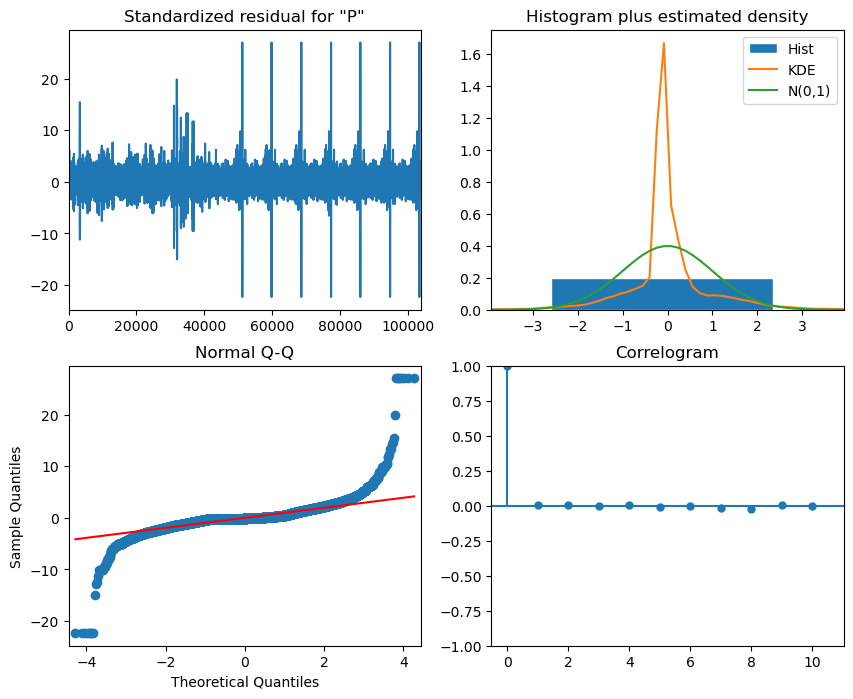

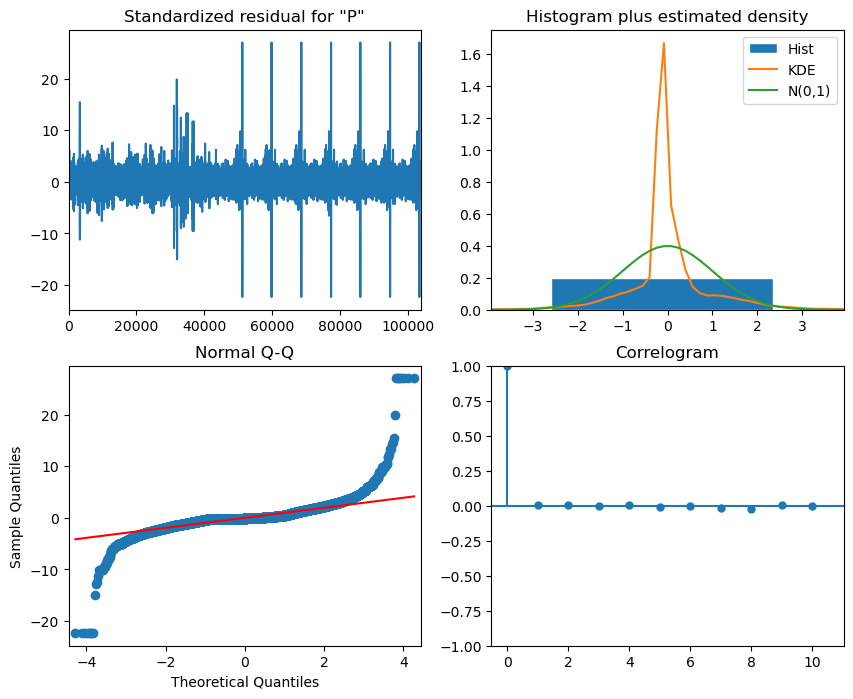

In [15]:
model_fit.plot_diagnostics(figsize=(10, 8))

In [28]:
longueur=puissance_test.shape[0] #+TC_test.shape[0]+TC_dp.shape[0]
prediction= model_fit.predict(start=pd.to_datetime('2021-12-31 07:00:00'),
                             end=pd.to_datetime('2022-01-01 21:00:00'),
                              n_periods=longueur,return_conf_int=True).forecast(longueur, alpha=0.005)
prediction.plot()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [26]:
prediction=pd.Series(prediction.values,index=puissance_test.index)
plt.figure(figsize=(15,5))
#plt.plot(puissance_test, label='puissance')
plt.plot(prediction,label='prediction')
plt.legend()

NameError: name 'prediction' is not defined

In [ ]:
print('L''erreur ABSOLUES moyenne:',mean_absolute_error(puissance_test,prediction))
print('L''erreur QUADRATIQUE moyenne:',mean_squared_error(puissance_test,prediction))

NameError: name 'prediction' is not defined

In [ ]:
from statsmodels.tsa.arima.model import ARMA


#model_ARMA=ARMA(puissance_train)  

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.arima.model' (c:\Users\ABDOULAHI FAYE\anaconda3\lib\site-packages\statsmodels\tsa\arima\model.py)

ESTIMATION DE LA PRODUCTION DANS L'ECHANTIOLLION DE MESURES

In [18]:
model=ARIMA(puissance_train,order=(5,0,4))
model_fit=model.fit()

In [19]:
puissance_test.shape[0]

365

<Axes: xlabel='Date (+00:00)'>

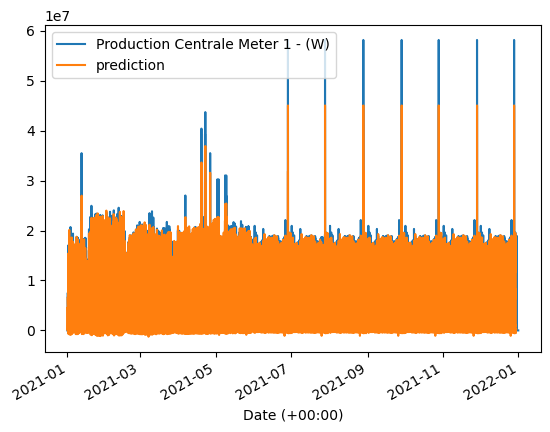

In [20]:
production['prediction']=model_fit.predict()
production.plot()
#plt.savefig(prediction)

In [21]:
production['2021-01-01'].plot()
plt.savefig('production_jenvier.png')

KeyError: '2021-01-01'

In [25]:
production['2021-01-31T00:05:00.000000000'].plot()
plt.savefig('production_octobre.png')

KeyError: '2021-01-31T00:05:00.000000000'

In [23]:
mois=np.array(pd.date_range(production.index[0],freq='M',periods=12))

mois

array(['2021-01-31T00:05:00.000000000', '2021-02-28T00:05:00.000000000',
       '2021-03-31T00:05:00.000000000', '2021-04-30T00:05:00.000000000',
       '2021-05-31T00:05:00.000000000', '2021-06-30T00:05:00.000000000',
       '2021-07-31T00:05:00.000000000', '2021-08-31T00:05:00.000000000',
       '2021-09-30T00:05:00.000000000', '2021-10-31T00:05:00.000000000',
       '2021-11-30T00:05:00.000000000', '2021-12-31T00:05:00.000000000'],
      dtype='datetime64[ns]')

KeyError: '2021-01-31'

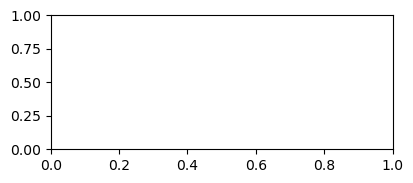

In [24]:
list_mois=['2021-01-31','2021-02-28',
       '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30',
       '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31',
       '2021-11-30', '2021-12-31']

fig=plt.figure(figsize=(15,8))
for i,j in enumerate(list_mois):
    
    ax=fig.add_subplot(4,3,1+i)
    ax.plot(production[j])

In [ ]:
production['prediction'].fillna(4.486998e+06, inplace=True)

In [ ]:
X=np.array(production.values)
X[:,1]

array([4490234.01354207,  326974.05124943,  238731.56551054, ...,
       4486998.        , 4486998.        , 4486998.        ])

In [ ]:
print('L''erreur absolu moyenne:',mean_absolute_error(X[:,0],X[:,1]))
print('L''erreur quadratique moyenne:',np.sqrt(mean_squared_error(X[:,0],X[:,1])))

Lerreur absolu moyenne: 820982.1790504362
Lerreur quadratique moyenne: 1496621.1187728832


In [ ]:
d=[1,2,
   3,4]
